In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dfx = pd.read_csv('csv_files/imputed.csv', index_col=0)
dfx.head()

,I1,I2,I3,pIPO,pH,pL,p1day,C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10,9.5,8.5,11.8699998855591,122,1,3.43,...,10600000,51.345,470,12719,11560,301,690,62,117,139
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8,10,8,7.25,259,0,-1.62,...,2400000,25.936,791,21792,19585,510,1120,71,242,237
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7,14,12,6.69999980926514,90,1,-1.24,...,5000000,7.378,201,5262,4785,128,325,61,33,60
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16,14,12.3900003433228,209,1,-0.91,...,4500000,8.526,328,8259,7574,177,509,80,59,110
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21,21,19,56.5999984741211,80,1,0.07,...,8250000,632.298,572,14830,13176,336,720,67,149,167


In [3]:
df_ids = df.filter(items=['I1', 'I2', 'I3'])
df_ids.head()

,I1,I2,I3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834
2,ACAD,ACADIA PHARMACEUTICALS INC,2834
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492


In [4]:
df_values = df.filter(items=['pIPO', 'pH', 'pL', 'p1day', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3'])
df_values.head()                            

,pIPO,pH,pL,p1day,C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


In [5]:
# finding IQR for each variable 
Q1 = df_values.quantile(0.25)
Q3 = df_values.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

pIPO     7.000000e+00
pH       4.000000e+00
pL       4.000000e+00
p1day    9.937501e+00
C1       6.775000e+01
C2       0.000000e+00
C3       1.350000e+00
C4       4.429223e-02
C5       3.063502e+07
C6       7.083029e+06
C7       4.589485e+02
T1       1.995000e+02
T2       6.044500e+03
T3       5.583500e+03
T4       1.405000e+02
T5       3.322500e+02
S1       3.975000e+01
S2       6.875000e+01
S3       7.300000e+01
dtype: float64


In [6]:
# identifying outlier value locations sort of 
# Q1 - 1.5 * IQR = lower bound 
# Q3 + 1.5 * IQR = upper bound 
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
outlier = (df_values < lower) | (df_values > upper)
# above is equivalent to this: outlier = (df_values < (Q1 - 1.5 * IQR)) | (df_values > (Q3 + 1.5 * IQR))
print(outlier)

      pIPO     pH     pL  p1day     C1     C2     C3     C4     C5     C6  \
0    False  False  False  False  False  False   True  False  False  False   
1    False  False  False  False   True   True  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False   True  False  False  False  False  False  False   
5    False  False  False  False  False  False  False  False  False  False   
6    False  False  False  False  False  False  False  False  False  False   
7    False  False  False  False  False   True  False  False  False  False   
8    False  False  False  False  False  False  False  False  False  False   
9    False  False  False  False  False  False  False  False  False  False   
10   False  False  False  False  False   True  False  False  False  False   
11   False  False  False  False  False  False   True  False  False  False   

In [7]:
def replace(v):
    if v > upper:
        v = upper
    elif v < lower:
        v = lower
    else:
        pass
    return (v)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb678ca1a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb678c3a160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb678ca1940>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb678c3a7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb678c3ab38>],
 'means': []}

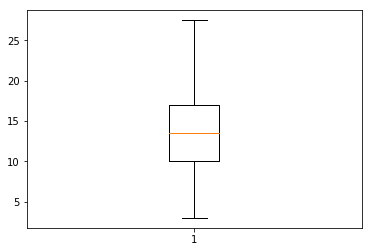

In [8]:
Q1 = df_values['pIPO'].quantile(0.25)
Q3 = df_values['pIPO'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df_values.pIPO = df_values.pIPO.apply(lambda v: replace(v))
plt.boxplot(df_values.pIPO)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb678baf358>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb678baf9e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb678baf208>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb678bb90b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb678bb9400>],
 'means': []}

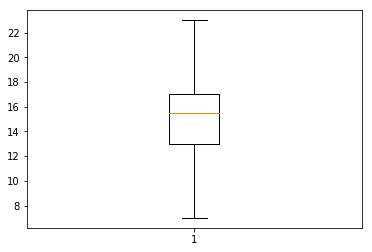

In [9]:
Q1 = df_values['pH'].quantile(0.25)
Q3 = df_values['pH'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df_values.pH = df_values.pH.apply(lambda v: replace(v))
plt.boxplot(df_values.pH)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb678b91ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb678b99198>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb678b91978>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb678b99828>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb678b99b70>],
 'means': []}

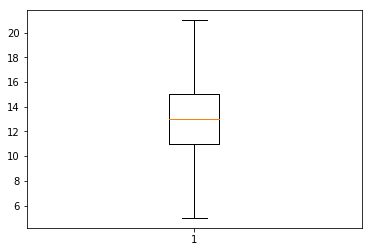

In [10]:
Q1 = df_values['pL'].quantile(0.25)
Q3 = df_values['pL'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df_values.pL = df_values.pL.apply(lambda v: replace(v))
plt.boxplot(df_values.pL)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb678afa240>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb678afa8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb678afa0f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb678afaf60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb678b062e8>],
 'means': []}

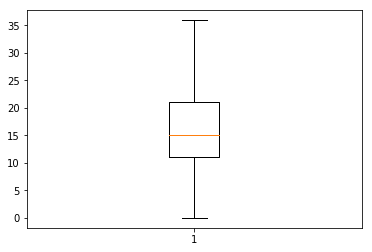

In [11]:
Q1 = df_values['p1day'].quantile(0.25)
Q3 = df_values['p1day'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df_values.p1day = df_values.p1day.apply(lambda v: replace(v))
plt.boxplot(df_values.p1day)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb678ada5f8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb678adac88>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb678ada4a8>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb678ae2358>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb678ae26a0>],
 'means': []}

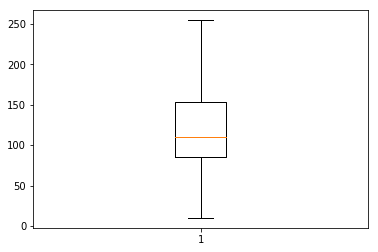

In [12]:
Q1 = df_values['C1'].quantile(0.25)
Q3 = df_values['C1'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df_values.C1 = df_values.C1.apply(lambda v: replace(v))
plt.boxplot(df_values.C1)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb678a36048>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb678a366d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb678a2aeb8>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb678a36d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb678a3e0f0>],
 'means': []}

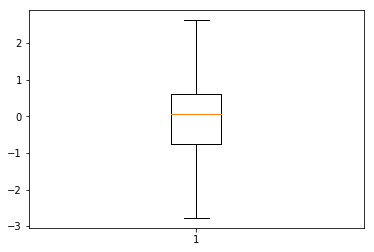

In [13]:
Q1 = df_values['C3'].quantile(0.25)
Q3 = df_values['C3'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df_values.C3 = df_values.C3.apply(lambda v: replace(v))
plt.boxplot(df_values.C3)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb678a069b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb678a0f080>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb678a06860>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb678a0f710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb678a0fa58>],
 'means': []}

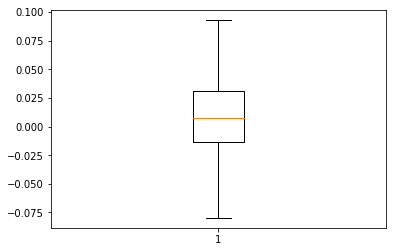

In [14]:
Q1 = df_values['C4'].quantile(0.25)
Q3 = df_values['C4'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df_values.C4 = df_values.C4.apply(lambda v: replace(v))
plt.boxplot(df_values.C4)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb6789e1cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb67896c3c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb6789e1ba8>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb67896ca58>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb67896cda0>],
 'means': []}

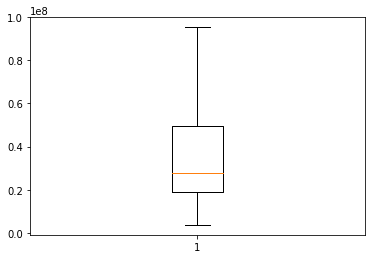

In [15]:
Q1 = df_values['C5'].quantile(0.25)
Q3 = df_values['C5'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df_values.C5 = df_values.C5.apply(lambda v: replace(v))
plt.boxplot(df_values.C5)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb678942400>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb678942a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb6789422b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb678949160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb6789494a8>],
 'means': []}

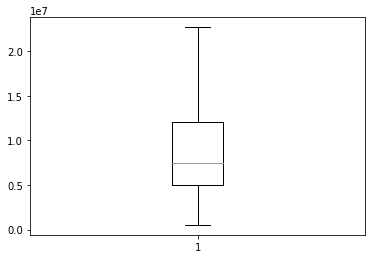

In [16]:
Q1 = df_values['C6'].quantile(0.25)
Q3 = df_values['C6'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df_values.C6 = df_values.C6.apply(lambda v: replace(v))
plt.boxplot(df_values.C6)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb6789109e8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb67891d0b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb678910898>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb67891d748>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb67891da90>],
 'means': []}

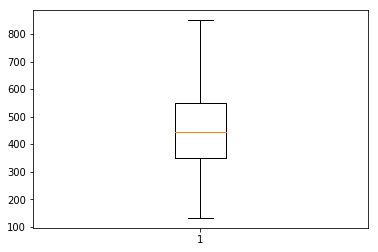

In [17]:
Q1 = df_values['T1'].quantile(0.25)
Q3 = df_values['T1'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df_values.T1 = df_values.T1.apply(lambda v: replace(v))
plt.boxplot(df_values.T1)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb67886cda0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb678877470>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb67886cc50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb678877b00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb678877e48>],
 'means': []}

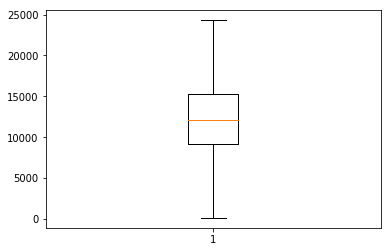

In [18]:
Q1 = df_values['T2'].quantile(0.25)
Q3 = df_values['T2'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df_values.T2 = df_values.T2.apply(lambda v: replace(v))
plt.boxplot(df_values.T2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb6788477f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb678847e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb6788476a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb678852550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb678852898>],
 'means': []}

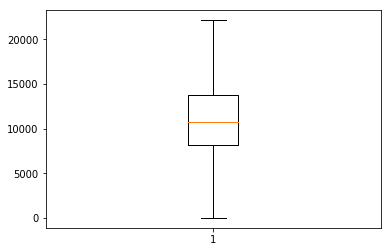

In [19]:
Q1 = df_values['T3'].quantile(0.25)
Q3 = df_values['T3'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df_values.T3 = df_values.T3.apply(lambda v: replace(v))
plt.boxplot(df_values.T3)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb67881ad68>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb6787a4438>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb67881ac18>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb6787a4ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb6787a4e10>],
 'means': []}

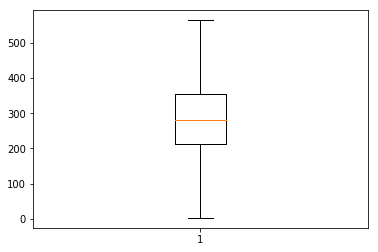

In [20]:
Q1 = df_values['T4'].quantile(0.25)
Q3 = df_values['T4'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df_values.T4 = df_values.T4.apply(lambda v: replace(v))
plt.boxplot(df_values.T4)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb6787767b8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb678776e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb678776668>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb678782518>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb678782860>],
 'means': []}

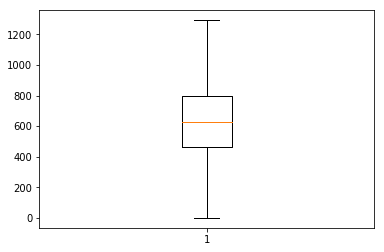

In [21]:
Q1 = df_values['T5'].quantile(0.25)
Q3 = df_values['T5'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df_values.T5 = df_values.T5.apply(lambda v: replace(v))
plt.boxplot(df_values.T5)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb6787566a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb678756d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb678756550>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb678762400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb678762748>],
 'means': []}

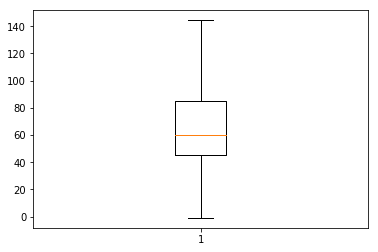

In [22]:
Q1 = df_values['S1'].quantile(0.25)
Q3 = df_values['S1'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df_values.S1 = df_values.S1.apply(lambda v: replace(v))
plt.boxplot(df_values.S1)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb676670a20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb6766790f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb6766708d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb676679780>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb676679ac8>],
 'means': []}

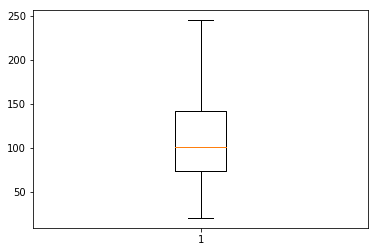

In [23]:
Q1 = df_values['S2'].quantile(0.25)
Q3 = df_values['S2'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df_values.S2 = df_values.S2.apply(lambda v: replace(v))
plt.boxplot(df_values.S2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb67669efd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb67664b6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb67669ee80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb67664bd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb6766540b8>],
 'means': []}

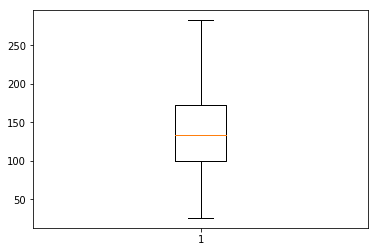

In [24]:
Q1 = df_values['S3'].quantile(0.25)
Q3 = df_values['S3'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df_values.S3 = df_values.S3.apply(lambda v: replace(v))
plt.boxplot(df_values.S3)

In [27]:
df = pd.concat([df_ids, df_values], axis=1)
df.head()

,I1,I2,I3,pIPO,pH,pL,p1day,C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.000,1.0,2.625,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,254.375,0.0,-1.620,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.000,1.0,-1.240,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.000,1.0,-0.910,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,35.936252,80.000,1.0,0.070,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


In [29]:
df.to_csv('csv_files/no_outliers.csv')